<a href="https://colab.research.google.com/github/aznaz43/IBM-Garanite---Using-Python/blob/main/IBM-Granit-Untuk%20Analisis%20Review%20restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**“Pemanfaatan IBM Granite untuk Analisis Review Restaurant dan Strategi Peningkatan Layanan”**

CLASSIFICATION

In [ ]:
!pip install langchain_community
!pip install replicate

Dataset : https://www.kaggle.com/datasets/moazeldsokyx/restaurant-reviews

In [2]:
import pandas as pd
from google.colab import files
data=files.upload()

Saving Restaurant Reviews.csv to Restaurant Reviews.csv


In [3]:
data = pd.read_csv('Restaurant Reviews.csv')
data

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2215,The staff was untrained and unfamiliar with th...,NaN
2216,The portions were skimpy and left us hungry. 0,NaN
2217,The restaurant had unclean restrooms and unple...,NaN
2218,The waiters were slow and forgetful with our o...,NaN


Mengecek pada kolom review apakah terdapat data kosong


In [ ]:
print(data.isna().sum())

Review      0
Liked     103
dtype: int64


Pada kolom review tidak ada baris yang kosong

In [4]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
  model=model,
  replicate_api_token=api_token,
)



In [ ]:
customer_review=data.head(50)['Review']
customer_review

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.
6,Honeslty it didn't taste THAT fresh.
7,The potatoes were like rubber and you could te...
8,The fries were great too.
9,A great touch.


Melakukan Klasifikasi Data Berdasarkan Review Positif, Negatif, Atau Mix  Menggunakan Granite menggunakan 25 Sampel

In [44]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
prompt = f"""
  clasify these review by positif, negatif, or mixed only without explanation make a table
  {reviews_text}
"""

# Invoke the model with example prompt
response = output.invoke(prompt)

# Print the response
print("Granite Model Response:\n")
print(response)

Granite Model Response:

| Review Number | Sentiment |
|-------------|-----------|
| 1           | Positive  |
| 2           | Negative  |
| 3           | Negative  |
| 4           | Positive  |
| 5           | Positive  |
| 6           | Negative  |
| 7           | Negative  |
| 8           | Negative  |
| 9           | Positive  |
| 10          | Positive  |
| 11          | Positive  |
| 12          | Negative  |
| 13          | Negative  |
| 14          | Positive  |
| 15          | Negative  |
| 16          | Negative  |
| 17          | Positive  |
| 18          | Negative  |
| 19          | Negative  |
| 20          | Negative  |
| 21          | Negative  |
| 22          | Positive  |
| 23          | Positive  |
| 24          | Positive  |
| 25          | Mixed     |


Mengubah output Menjadi Sebuah Tabel

In [119]:
import pandas as pd
import io

# Convert the markdown table string to a pandas DataFrame
# Use io.StringIO to treat the string as a file
# Use the first two rows as header and separator, then read the data
tabel_response = pd.read_csv(io.StringIO(response), sep='|', skiprows=[1]).dropna(axis=1, how='all')

# Clean up column names (remove leading/trailing whitespace)
tabel_response.columns = tabel_response.columns.str.strip()

# Remove the first row which is the header repeated
tabel_response = tabel_response.iloc[0:]

# Rename the columns
tabel_response = tabel_response.rename(columns={'Review Number': 'Review', 'Sentiment': 'Sentiment'})

# Display the resulting DataFrame
display(tabel_response)

,Review,Sentiment
0,1,Positive
1,2,Negative
2,3,Negative
3,4,Positive
4,5,Positive
5,6,Negative
6,7,Negative
7,8,Negative
8,9,Positive
9,10,Positive


Menentukan jumlah review berdasarkan kategori positif, negatif, dan mix


In [79]:
 grup_review = tabel_response['Sentiment'].value_counts()
 grup_review


,count
Sentiment,
Negative,13
Positive,11
Mixed,1


<Figure size 640x480 with 0 Axes>

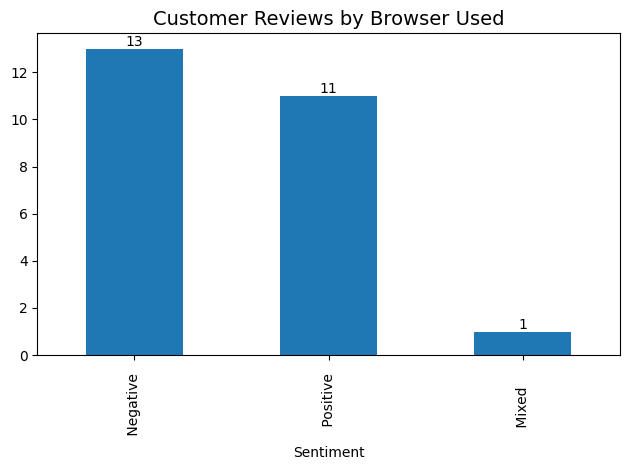

In [215]:
import matplotlib.pyplot as plt
plt.clf()

# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
bar_review = tabel_response['Sentiment'].value_counts()


plt.figure()
# membuat bar plot dengan method `plot.bar()` dari pandas
ax_review=bar_review.plot.bar()
plt.bar_label(ax_review.containers[0], fontsize=10, color='black')
plt.title('Customer Reviews by Browser Used', size=14)
plt.tight_layout()
plt.show()


Klasifikasi Review Pelanggan berdasarkan kategori service (pelayanan), food(makanan), dan price(harga)

In [95]:
# Refine the prompt to include reviews
reviews_text1 = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
prompt = f"""
  clasify these  review by service, food, price without explanation and make a table
  {reviews_text1}
"""

# Invoke the model with example prompt
response1 = output.invoke(prompt)

# Print the response
print("Granite Model Response:\n")
print(response1)

Granite Model Response:

| Review Number | Service | Food | Price |
|-------------|----------|------|-------|
| 1           | -        | +    | -     |
| 2           | -        | -    | -     |
| 3           | -        | -    | -     |
| 4           | -        | +    | -     |
| 5           | -        | -    | +     |
| 6           | -        | -    | -     |
| 7           | -        | -    | -     |
| 8           | -        | -    | -     |
| 9           | -        | +    | -     |
| 10          | -        | -    | -     |
| 11          | +        | -    | -     |
| 12          | -        | -    | -     |
| 13          | -        | -    | -     |
| 14          | -        | +    | -     |
| 15          | -        | -    | -     |
| 16          | -        | -    | -     |
| 17          | -        | +    | -     |
| 18          | -        | -    | -     |
| 19          | -        | -    | -     |
| 20          | -        | -    | -     |
| 21          | -        | -    | -     |
| 22    

Mengubah Output Menjadi sebuah Tabel

In [127]:
import pandas as pd
import io

# Convert the markdown table string to a pandas DataFrame
# Use io.StringIO to treat the string as a file
# Use the first two rows as header and separator, then read the data
tabel_kategori = pd.read_csv(io.StringIO(response1), sep='|', skiprows=[1]).dropna(axis=1, how='all')

# Clean up column names (remove leading/trailing whitespace)
tabel_kategori.columns = tabel_kategori.columns.str.strip()

# Remove the first row which is the header repeated
tabel_kategori = tabel_kategori.iloc[0:]

# Rename the columns


# Display the resulting DataFrame
display(tabel_kategori)

,Unnamed: 0,Review Number,Service,Food,Price
0,NaN,1.0,-,+,-
1,NaN,2.0,-,-,-
2,NaN,3.0,-,-,-
3,NaN,4.0,-,+,-
4,NaN,5.0,-,-,+
5,NaN,6.0,-,-,-
6,NaN,7.0,-,-,-
7,NaN,8.0,-,-,-
8,NaN,9.0,-,+,-
9,NaN,10.0,-,-,-


Tahap Pembersihan Tabel

In [153]:
data_kategori = tabel_kategori.drop(index=[25,26,27,28])
data_kategori
kolom_hapus = data_kategori.columns[0]
data_kategori1 = data_kategori.drop(kolom_hapus, axis=1)
data_kategori1


,Review Number,Service,Food,Price
0,1.0,-,+,-
1,2.0,-,-,-
2,3.0,-,-,-
3,4.0,-,+,-
4,5.0,-,-,+
5,6.0,-,-,-
6,7.0,-,-,-
7,8.0,-,-,-
8,9.0,-,+,-
9,10.0,-,-,-


Menentukan Jumlah Review Berdasarkan Kategori

In [156]:
service =data_kategori1['Service'].value_counts()
food=data_kategori1['Food'].value_counts()
price=data_kategori1['Price'].value_counts()
print(service)
print(food)
print(price)

Service
-            22
+             3
Name: count, dtype: int64
Food
-        19
+         6
Name: count, dtype: int64
Price
-         24
+          1
Name: count, dtype: int64


Visualisasi Data

<Figure size 640x480 with 0 Axes>

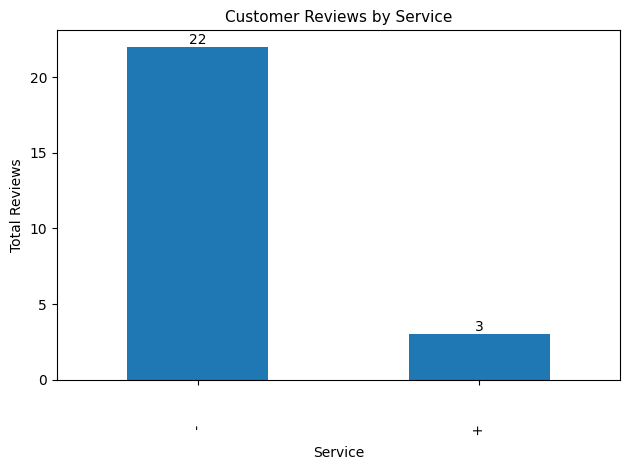

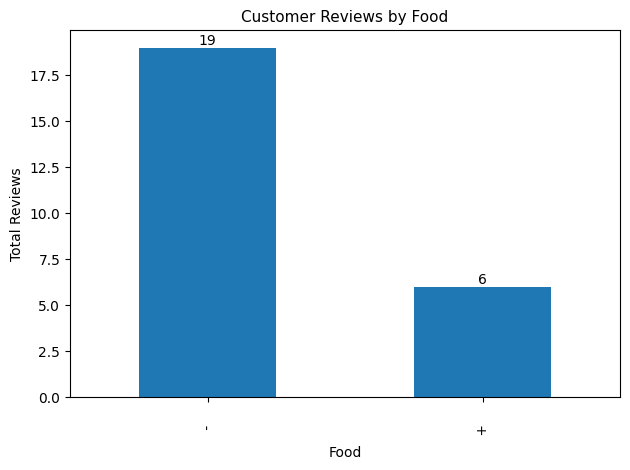

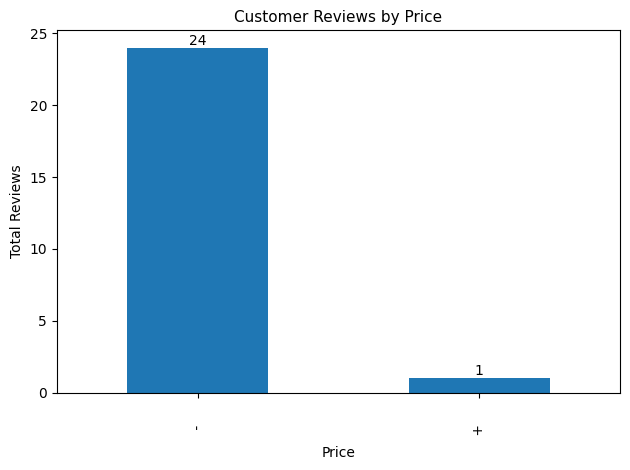

In [209]:
import matplotlib.pyplot as plt
plt.clf()

# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
bar_service = data_kategori1['Service'].value_counts()
bar_food=data_kategori1['Food'].value_counts()
bar_price=data_kategori1['Price'].value_counts()

plt.figure()
# membuat bar plot dengan method `plot.bar()` dari pandas
ax_service = bar_service.plot.bar()
plt.bar_label(ax_service.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Service', size=11)
plt.tight_layout()
plt.show()

print(' ')


ax_food = bar_food.plot.bar()
plt.bar_label(ax_food.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Food', size=11)
plt.tight_layout()
plt.show()

print(' ')

ax_price = bar_price.plot.bar()
plt.bar_label(ax_price.containers[0], fontsize=10, color='black')
plt.ylabel('Total Reviews')
plt.title('Customer Reviews by Price', size=11)
plt.tight_layout()
plt.show()

SUMMARIZATION DATA MENGGUNAKAN IBM GRANITE DENGAN 25 SAMPEL REVIEW

In [214]:
# Refine the prompt to include reviews
summarization_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(data.head(25)['Review'])])
new_prompt = f"""
  Summarize this restaurant review  in 3 sentences
  {summarization_text}
"""

# Invoke the model with example prompt
response2 = output.invoke(new_prompt)

# Print the response
print("Granite Model Response:\n")
print(response2)

Granite Model Response:

The restaurant received mixed reviews, with some customers expressing love for the place, praising the menu selection and prices, and enjoying specific dishes like the Cape Cod ravoli. However, many reviews criticized the food quality, citing issues such as a poor crust, lack of freshness, inedible potatoes, and even an alarming claim of finding human hair in the food. Service was another contentious point, with complaints about slowness and lack of attentiveness, while some reviewers appreciated the prompt service. The pricing was also a point of contention, with some finding it overpriced and others deeming it reasonable. Despite a few positive comments about the ambiance and interior design, the overall consensus leans towards dissatisfaction, with several reviewers stating they would not return.
